In [24]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import os
import datetime

#Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# sklearn stuff
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Imputer 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

### Reading in data 

In [25]:
#maindir = "/home/anerdi/Desktop/Zillow"
maindir = "/users/ccheung/Desktop/Zillow"

logerror = pd.read_csv(maindir + "/data/train_2016_v2.csv/train_2016_v2.csv")
logerror['weeknumber'] = logerror['transactiondate'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').isocalendar()[1])
logerror['month'] = logerror['transactiondate'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').month)
properties = pd.read_csv(maindir + "/data/properties_2016.csv/properties_2016.csv")
test_parcels = pd.read_csv(maindir + "/data/sample_submission.csv", usecols = ['ParcelId'])

test_parcels.rename(columns={'ParcelId':'parcelid'}, inplace=True)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## ElasticNet

In [39]:
# join on parcel id
data = pd.merge(properties,logerror[['parcelid','logerror','month']], on='parcelid')

ElasticNetError = pd.DataFrame(pd.read_csv("ElasticNet.gz",compression='gzip'))
ElasticNetError.rename(columns={'ParcelId': 'parcelid'}, inplace=True)
ElasticNetErrorT = pd.merge(ElasticNetError[['parcelid', '201610', '201611', '201612']], \
         data[['parcelid','logerror','month','calculatedfinishedsquarefeet', 'latitude', 'bathroomcnt', \
               'structuretaxvaluedollarcnt','bedroomcnt']], on='parcelid')

In [40]:
Y = ElasticNetErrorT['201610']

M = ElasticNetErrorT['calculatedfinishedsquarefeet'].mean()
X = ElasticNetErrorT['calculatedfinishedsquarefeet'].replace(M, np.NaN)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


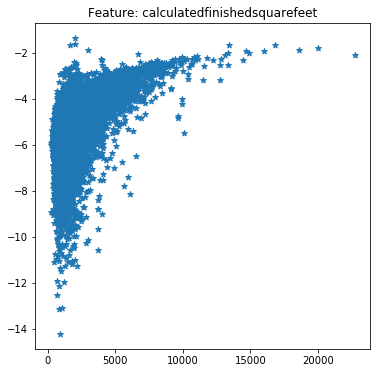

In [41]:
plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: calculatedfinishedsquarefeet")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


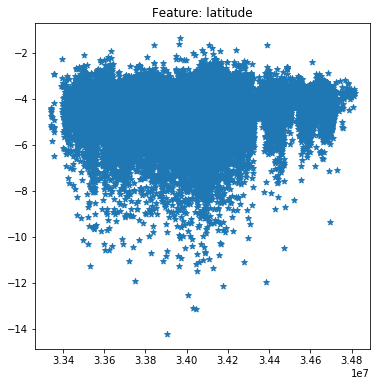

In [42]:
M = ElasticNetErrorT['latitude'].mean()
X = ElasticNetErrorT['latitude'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: latitude")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


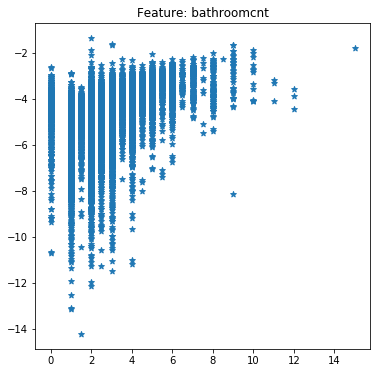

In [43]:
M = ElasticNetErrorT['bathroomcnt'].mean()
X = ElasticNetErrorT['bathroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: bathroomcnt")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


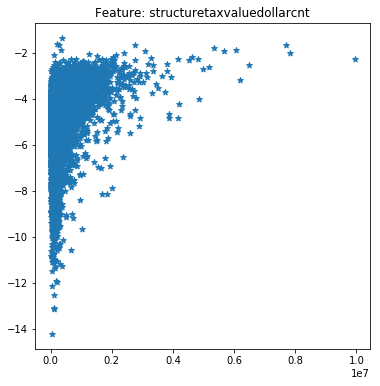

In [44]:
M = ElasticNetErrorT['structuretaxvaluedollarcnt'].mean()
X = ElasticNetErrorT['structuretaxvaluedollarcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: structuretaxvaluedollarcnt")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


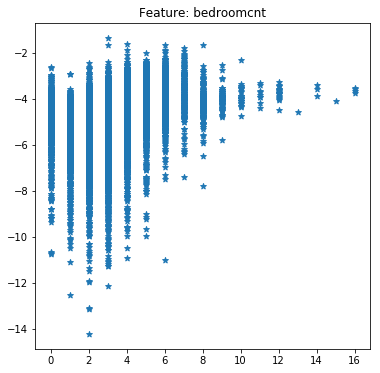

In [45]:
M = ElasticNetErrorT['bedroomcnt'].mean()
X = ElasticNetErrorT['bedroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: bedroomcnt")
plt.legend(loc=1)

## LARM

In [46]:
LARMError = pd.DataFrame(pd.read_csv("LARM.gz",compression='gzip'))
LARMError.rename(columns={'ParcelId': 'parcelid'}, inplace=True)
LARMError = pd.merge(LARMError[['parcelid', '201610', '201611', '201612']], \
         data[['parcelid','logerror','month','calculatedfinishedsquarefeet', 'latitude', 'bathroomcnt', \
               'structuretaxvaluedollarcnt','bedroomcnt']], on='parcelid')

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


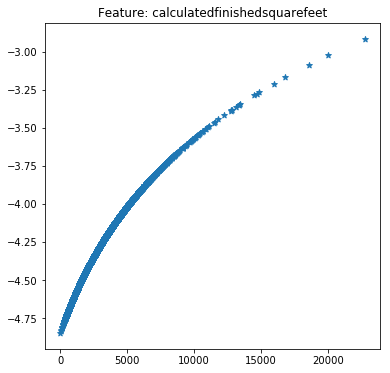

In [47]:
Y = LARMError['201610'] 

M = LARMError['calculatedfinishedsquarefeet'].mean()
X = LARMError['calculatedfinishedsquarefeet'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: calculatedfinishedsquarefeet")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


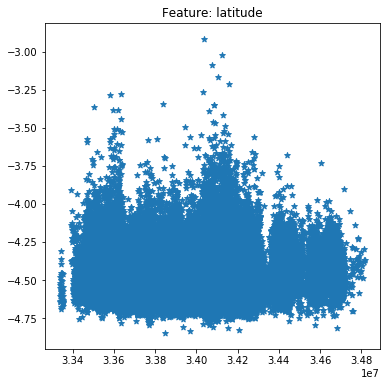

In [48]:
M = ElasticNetErrorT['latitude'].mean()
X = LARMError['latitude'].replace(M, np.NaN)


plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: latitude")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


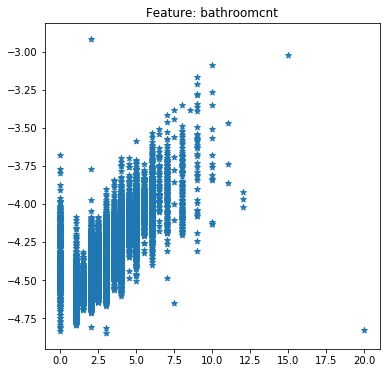

In [49]:
M = LARMError['bathroomcnt'].mean()
X = LARMError['bathroomcnt'].replace(M, np.NaN)


plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: bathroomcnt")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


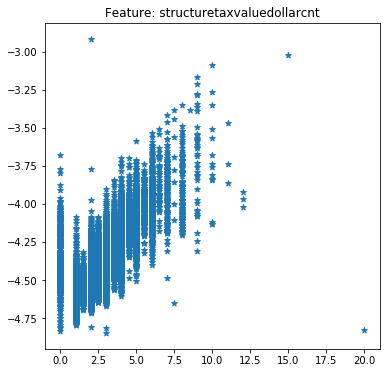

In [50]:
M = LARMError['structuretaxvaluedollarcnt'].mean()
X_oct = LARMError['structuretaxvaluedollarcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: structuretaxvaluedollarcnt")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


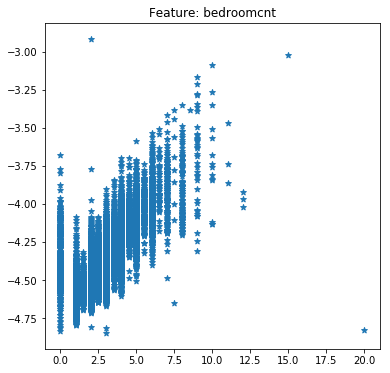

In [51]:
M = LARMError['bedroomcnt'].mean()
X_oct = LARMError['bedroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: bedroomcnt")
plt.legend(loc=1)

## HuberRegressor

In [52]:
HuberRegressorError = pd.DataFrame(pd.read_csv("HuberRegressor.gz",compression='gzip'))
HuberRegressorError.rename(columns={'ParcelId': 'parcelid'}, inplace=True)
HuberRegressorError = pd.merge(HuberRegressorError[['parcelid', '201610', '201611', '201612']], \
         data[['parcelid','logerror','month','calculatedfinishedsquarefeet', 'latitude', 'bathroomcnt', \
               'structuretaxvaluedollarcnt', 'bedroomcnt']], on='parcelid')

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


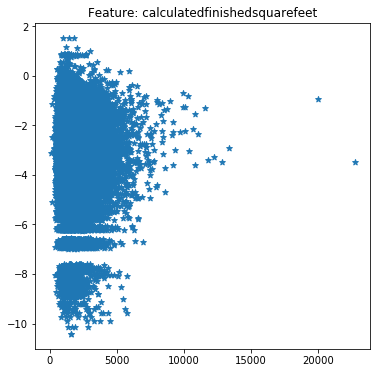

In [53]:
Y = HuberRegressorError['201610'] - HuberRegressorError['logerror'] 

M = HuberRegressorError['calculatedfinishedsquarefeet'].mean()
X = HuberRegressorError['calculatedfinishedsquarefeet'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: calculatedfinishedsquarefeet")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


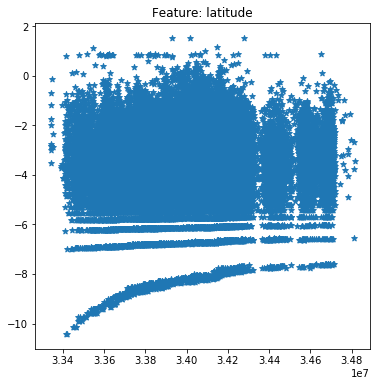

In [54]:
M = HuberRegressorError['latitude'].mean()
X = HuberRegressorError['latitude'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: latitude")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


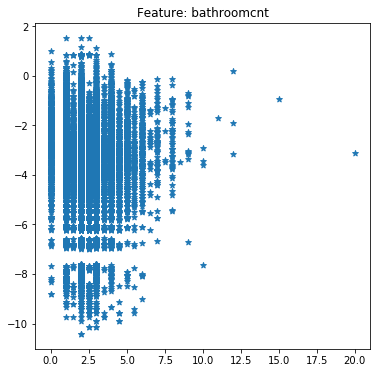

In [55]:
M = HuberRegressorError['bathroomcnt'].mean()
X = HuberRegressorError['bathroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: bathroomcnt")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


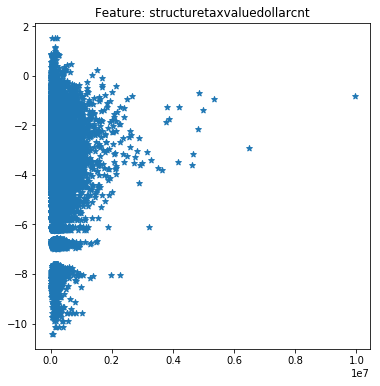

In [56]:
M = HuberRegressorError['structuretaxvaluedollarcnt'].mean()
X = HuberRegressorError['structuretaxvaluedollarcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: structuretaxvaluedollarcnt")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


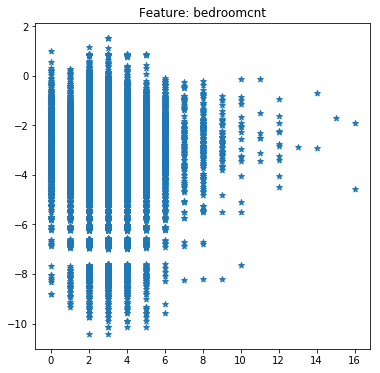

In [57]:
M = HuberRegressorError['bedroomcnt'].mean()
X = HuberRegressorError['bedroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: bedroomcnt")
plt.legend(loc=1)

## Linear Mixed Effect Model

In [58]:
LMEError = pd.DataFrame(pd.read_csv("LME.csv.gz",compression='gzip'))
LMEError.rename(columns={'ParcelId': 'parcelid'}, inplace=True)
LMEError = pd.merge(LARMError[['parcelid', '201610', '201611', '201612']], \
         data[['parcelid','logerror','month','calculatedfinishedsquarefeet', 'latitude', 'bathroomcnt', \
               'structuretaxvaluedollarcnt', 'bedroomcnt']], on='parcelid')

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


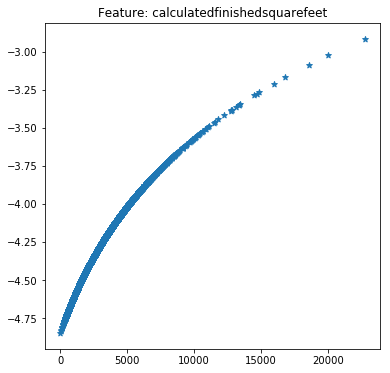

In [59]:
Y = LMEError['201610']

M = LMEError['calculatedfinishedsquarefeet'].mean()
X = LMEError['calculatedfinishedsquarefeet'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: calculatedfinishedsquarefeet")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


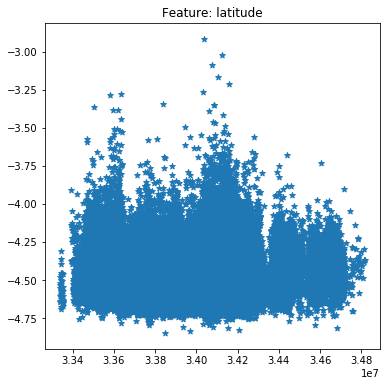

In [60]:
M = LMEError['latitude'].mean()
X = LMEError['latitude'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: latitude")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


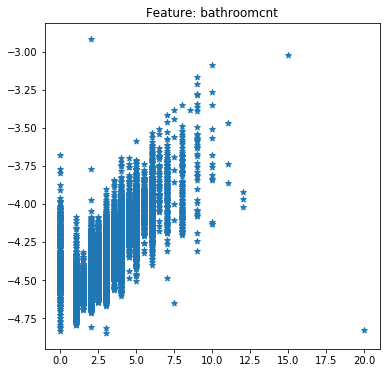

In [61]:
M = LMEError['bathroomcnt'].mean()
X = LMEError['bathroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: bathroomcnt")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


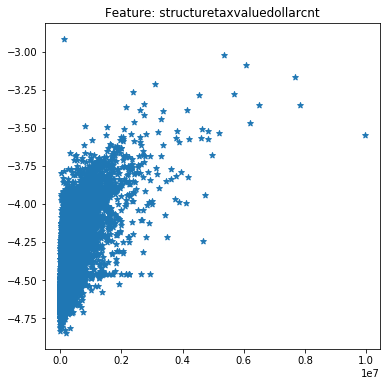

In [62]:
M = LMEError['structuretaxvaluedollarcnt'].mean()
X = LMEError['structuretaxvaluedollarcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: structuretaxvaluedollarcnt")
plt.legend(loc=1)

C:\Users\ccheung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


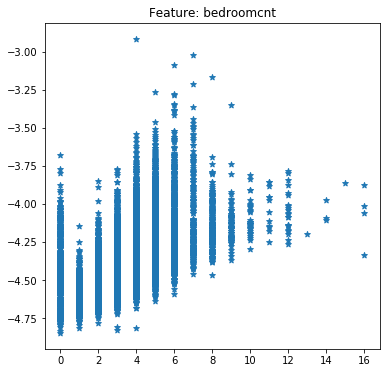

In [63]:
M = LMEError['bedroomcnt'].mean()
X = LMEError['bedroomcnt'].replace(M, np.NaN)

plt.figure(figsize=(6,6))
plt.scatter(X.values, np.log(Y.values), marker='*')
plt.title("Feature: bedroomcnt")
plt.legend(loc=1)